In [11]:
import os
from glob import glob
from PIL import Image
import pydicom
import numpy as np

In [12]:
def norm_img(img):
    norm_image = np.array(img, dtype=np.float64)
    norm_image -= np.min(norm_image)
    norm_image /= np.max(norm_image)
    normalized_image = norm_image * 255
    normalized_image = normalized_image.astype(np.uint8)
    return normalized_image
    
def dcm_windowing(ds, center=40, width=400):
    dcm_array = ds.pixel_array
    hu_image = dcm_array * ds.RescaleSlope + ds.RescaleIntercept
    # try:
    #     hu_image = dcm_array * dcm.RescaleSlope + dcm.RescaleIntercept
    # except AttributeError:
    #     hu_image = dcm_array
    # hu_image[hu_image < -1024] = -1024

    # img_min = dcm.WindowCenter - dcm.WindowWidth // 2
    # img_max = dcm.WindowCenter + dcm.WindowWidth // 2
    img_min = center - width // 2
    img_max = center + width // 2
    
    window_image = hu_image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max

    normalized_img = norm_img(window_image)
    p_image = Image.fromarray(normalized_img)
    p_image = p_image.resize((512, 512))
    
    return p_image


def get_slice_no(raw_path):
    l3_dcm_id = None
    with open(raw_path, 'r', encoding="utf-8") as f:
        lines = f.readlines()
    for i, line in enumerate(lines):
        if line.strip() == "#SliceNo":
            l3_dcm_id = int(lines[i+1])
            return l3_dcm_id
    return l3_dcm_id

In [13]:
train_data_home = "C:\\Users\\qwe14\\0.code\\sarcopenia\\data_train_raw\\#AsanNas\\"
train_img_save_path = "C:\\Users\\qwe14\\0.code\\sarcopenia\\data_test\\images\\"

In [14]:
train_data_dirs = os.listdir(train_data_home)
data_numbering = 0
relation_table = ""
error_table = ""
for train_dir in train_data_dirs:
    dir_path = os.path.join(train_data_home, train_dir)
    data_ids = glob(f"{dir_path}\\*")
    data_ids = list(set([date.split("\\")[-1].split(".")[0][:-4] for date in data_ids]))
    for data_id in data_ids:
        data_numbering += 1
        raw_path = os.path.join(dir_path, f"{data_id}_RAW.txt")
        try:
            dcm_no = get_slice_no(raw_path)
        except FileNotFoundError as e:
            error_table += f"FileNotFound(RAW.txt): {raw_path}\n"
        
        # image code
        dcm_path = os.path.join(dir_path, f"{data_id}_DCM{os.sep}{dcm_no:05d}.dcm")
        try:
            ds = pydicom.dcmread(dcm_path)
        except pydicom.errors.InvalidDicomError as e:
            error_table += f"InvalidDicom: {dcm_path}\n"
        except FileNotFoundError as e:
            error_table += f"FileNotFoundError(dcm): {dcm_path}\n"

        png_path = os.path.join(train_img_save_path, f"{data_numbering:05d}_{data_id}.png")

        generate_jpg = png_path.split("\\")[-1]
        dcm_path = "/".join(dcm_path.split("\\")[-3:-1])
        relation_table += f"{dcm_path}\t{generate_jpg}\n"
        img_array = dcm_windowing(ds)
        print(png_path)
        img_array.save(png_path)
    with open("data_relation.txt", "w", encoding='utf-8') as f:
        f.write(relation_table)
    with open("data_error.txt", "w", encoding='utf-8') as f:
        f.write(error_table)


C:\Users\qwe14\0.code\sarcopenia\data_test\images\00001_20061220.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00002_20070803.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00003_20061124.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00004_20070802.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00005_20071025.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00006_20080222.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00007_20070417.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00008_20070816.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00009_20070206.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00010_20070213.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00011_20080311.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00012_20070831.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00013_20071005.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00014_20070204.png
C:\Users\qwe14\0.code\sarcopenia\d

C:\Users\qwe14\anaconda3\envs\timm_model\Lib\site-packages\pydicom\charset.py:754: UserWarning: Unknown encoding 'ISO_IR 149' - using default encoding instead
  _warn_about_invalid_encoding(encoding)


C:\Users\qwe14\0.code\sarcopenia\data_test\images\00249_20141026.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00250_20160216.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00251_20150812.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00252_20150625.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00253_20141031.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00254_20160106.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00255_20150720.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00256_20160115.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00257_20141031.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00258_20151022.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00259_20141110.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00260_20160524.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00261_20160105.png
C:\Users\qwe14\0.code\sarcopenia\data_test\images\00262_20141106.png
C:\Users\qwe14\0.code\sarcopenia\d

In [15]:
import numpy as np
import copy
from PIL import Image

In [16]:
data_home = "C:\\Users\\qwe14\\0.code\\sarcopenia\\data_train_raw\\#AsanNas\\"
annot_home = "C:\\Users\\qwe14\\0.code\\sarcopenia\\data_test\\masks\\"

In [19]:
with open("data_relation.txt", "r", encoding='utf-8') as f:
    lines = f.readlines()

err_msg = ""
train_annot_data = ""
for line in lines:
    # SarcopeniaCase138/20150717_DCM	00081_20150717.png
    dcm_dir_path, png_path = line.strip().split("\t")
    dcm_roi_path = dcm_dir_path.replace("DCM", "ROI") # SarcopeniaCase138/20150717_DOI
    try:
        roi_img_path = glob(os.path.join(data_home, dcm_roi_path, "Mask*.png"))[0]
        hu_val = np.array(Image.open(roi_img_path))
        
        hu_val = hu_val.astype(np.int16)
        unique = np.unique(hu_val)
        if len(unique) != 4:
            err_msg += f"Not enough annot:\t{dcm_dir_path}\t{png_path}\t{unique}\n"
        else:
            mask_img = np.zeros_like(hu_val)
            for i in range(1, 4):
                mask_img[hu_val == i] = i
            # 1 == Subcutaneous Fat, 2 == Muscle, 3 == Visceral Fat
            p_image = Image.fromarray(mask_img)
            new_annot_img = f"{annot_home}{png_path}"
            cv2.imwrite(new_annot_img, mask_img)
            #p_image.save(new_annot_img)
            train_annot_data += f"{png_path}\n"
    except IndexError:
        err = os.path.join(data_home, dcm_roi_path, "Mask*.png")
        err_msg += f"Index:\t{err}\n"
    
with open("annot_error.txt", "w", encoding='utf-8') as f:
    f.write(err_msg)
with open("annot_train.txt", "w", encoding='utf-8') as f:
    f.write(train_annot_data)

## test set: Image와 마스크 보기

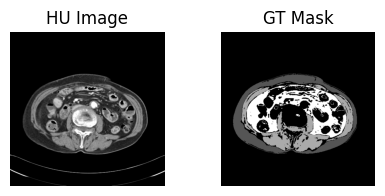

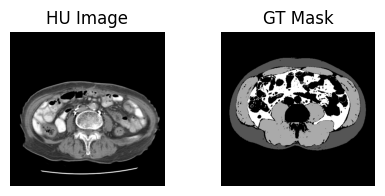

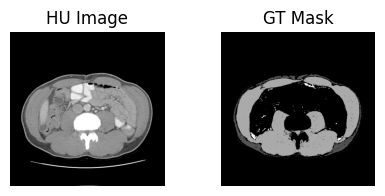

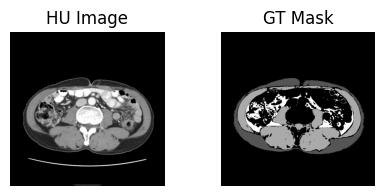

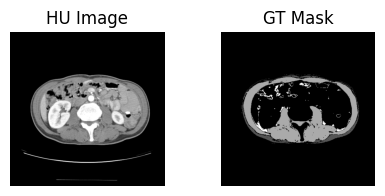

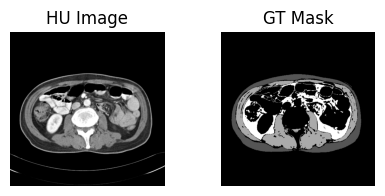

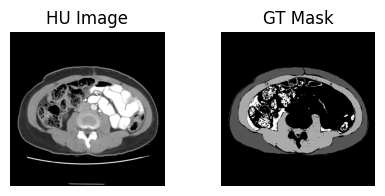

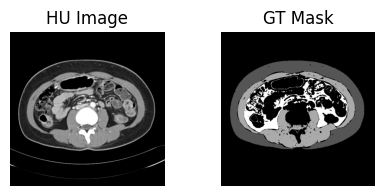

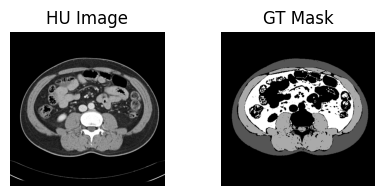

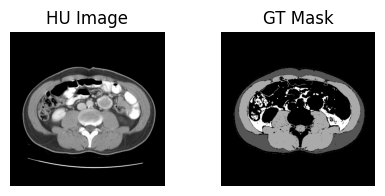

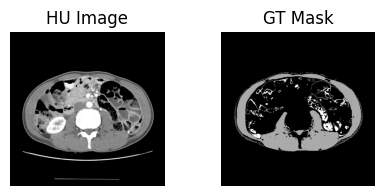

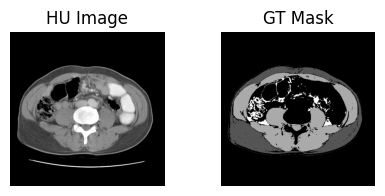

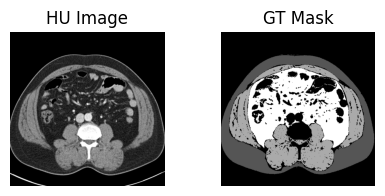

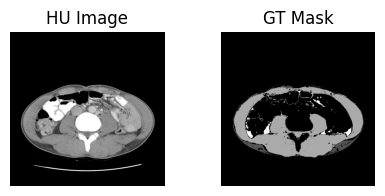

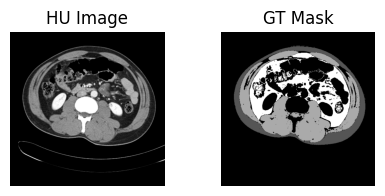

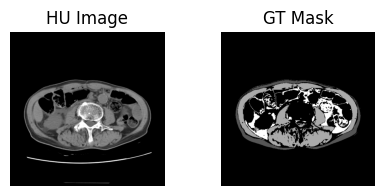

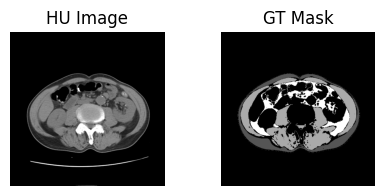

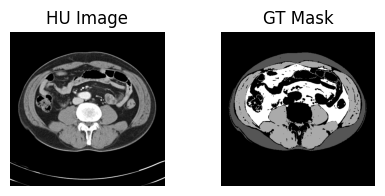

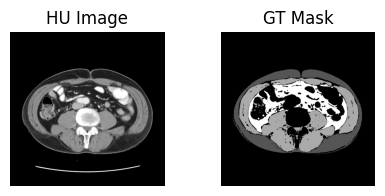

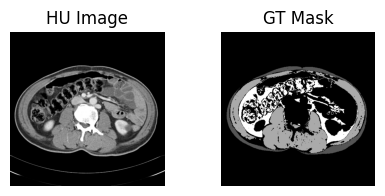

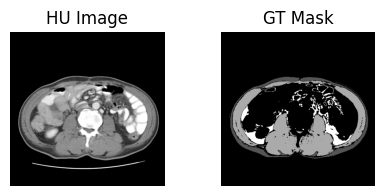

In [20]:
annot_home = "C:\\Users\\qwe14\\0.code\\sarcopenia\\data_test\\masks\\"
path = glob(f"{annot_home}*.png")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

img_before = cv2.imread(path[0], cv2.IMREAD_COLOR)
img_before2 = cv2.imread(path[0], cv2.IMREAD_COLOR)
import numpy as np
import cv2
mask_path= r'C:\Users\qwe14\0.code\sarcopenia\data_test\masks\*.png'
img_path = r'C:\Users\qwe14\0.code\sarcopenia\data_test\images\*.png'
mask_paths = glob(mask_path)
img_paths = glob(img_path)
for idx, mask in enumerate(mask_paths):
    img = mask.replace("masks", "images")
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    
    mask = cv2.imread(mask, cv2.IMREAD_COLOR)
    plt.figure(figsize=(5,2))
    plt.subplot(1,2,1)
    plt.gca().set_title('HU Image')
    plt.axis('off')
    plt.imshow(img, cmap = cm.gray) # Mask_Body # 1 이상
    
    plt.subplot(1,2,2)
    plt.gca().set_title('GT Mask')
    plt.axis('off')
    mask[mask == 1] = 255//3
    mask[mask == 2] = 255*2//3
    mask[mask == 3] = 255
    plt.imshow(mask.astype(np.int16), cmap = cm.gray)  # Mask_SFatIns  # 1, 2
    plt.show()

    if idx == 20:
        break